In [9]:
# Schablonbelopp per utbildningsområde
schablonbelopp = {
    'Data/IT': {'utan_moms': 69900, 'med_moms': 74100},
    'Ekonomi, administration och försäljning': {'utan_moms': 62900, 'med_moms': 66600},
    'Friskvård och kroppsvård': {'utan_moms': 74800, 'med_moms': 79200},
    'Hotell, restaurang och turism': {'utan_moms': 64900, 'med_moms': 68700},
    'Hälso- och sjukvård samt socialt arbete': {'utan_moms': 67000, 'med_moms': 71000},
    'Journalistik och information': {'utan_moms': 66600, 'med_moms': 70600},
    'Juridik': {'utan_moms': 60500, 'med_moms': 64100},
    'Kultur, media och design': {'utan_moms': 84400, 'med_moms': 89400},
    'Lantbruk, djurvård, trädgård, skog och fiske': {'utan_moms': 110200, 'med_moms': 116700},
    'Pedagogik och undervisning': {'utan_moms': 71300, 'med_moms': 75500},
    'Samhällsbyggnad och byggteknik': {'utan_moms': 70400, 'med_moms': 74600},
    'Säkerhetstjänster': {'utan_moms': 63000, 'med_moms': 66800},
    'Teknik och tillverkning': {'utan_moms': 85900, 'med_moms': 91000},
    'Transporttjänster': {'utan_moms': 80400, 'med_moms': 85200},
}

# Funktion för att räkna ut statsbidrag
def beräkna_statsbidrag(utbildningsområde, antal_platser, momskompensation):
    if utbildningsområde not in schablonbelopp:
        print("Utbildningsområdet finns inte i listan.")
        return 0
    belopp_per_plats = schablonbelopp[utbildningsområde]['med_moms'] if momskompensation else schablonbelopp[utbildningsområde]['utan_moms']
    return antal_platser * belopp_per_plats

# Användargränssnitt
print("Välj utbildningsområde:")
utbildningsområden = list(schablonbelopp.keys())
for i, område in enumerate(utbildningsområden, 1):
    print(f"{i}. {område}")

try:
    val = int(input("Ange nummer för utbildningsområde: "))
    if val < 1 or val > len(utbildningsområden):
        print("Felaktigt val av utbildningsområde.")
    else:
        utbildningsområde = utbildningsområden[val - 1]
        antal_platser = int(input("Ange antal beviljade platser: "))
        moms_input = input("Är anordnaren berättigad till momskompensation? (ja/nej): ").strip().lower()
        
        if moms_input == 'ja':
            momskompensation = True
        elif moms_input == 'nej':
            momskompensation = False
        else:
            print("Felaktigt svar för momskompensation. Antar 'nej'.")
            momskompensation = False

        statsbidrag = beräkna_statsbidrag(utbildningsområde, antal_platser, momskompensation)
        print(f"\nStatsbidraget för utbildningen '{utbildningsområde}' med {antal_platser} platser är: {statsbidrag:,} kr")

except ValueError:
    print("Fel: Du måste skriva ett giltigt heltal.")


Välj utbildningsområde:
1. Data/IT
2. Ekonomi, administration och försäljning
3. Friskvård och kroppsvård
4. Hotell, restaurang och turism
5. Hälso- och sjukvård samt socialt arbete
6. Journalistik och information
7. Juridik
8. Kultur, media och design
9. Lantbruk, djurvård, trädgård, skog och fiske
10. Pedagogik och undervisning
11. Samhällsbyggnad och byggteknik
12. Säkerhetstjänster
13. Teknik och tillverkning
14. Transporttjänster

Statsbidraget för utbildningen 'Data/IT' med 2 platser är: 139,800 kr


Välj ett utbildningsområde:
1. Data/IT
2. Ekonomi, administration och försäljning
3. Friskvård och kroppsvård
4. Hotell, restaurang och turism
5. Hälso- och sjukvård samt socialt arbete
6. Journalistik och information
7. Juridik
8. Kultur, media och design
9. Lantbruk, djurvård, trädgård, skog och fiske
10. Pedagogik och undervisning
11. Samhällsbyggnad och byggteknik
12. Säkerhetstjänster
13. Teknik och tillverkning
14. Transporttjänster

 Statistik för: Data/IT
- Utan momskompensation: 69900
- Med momskompensation: 74100


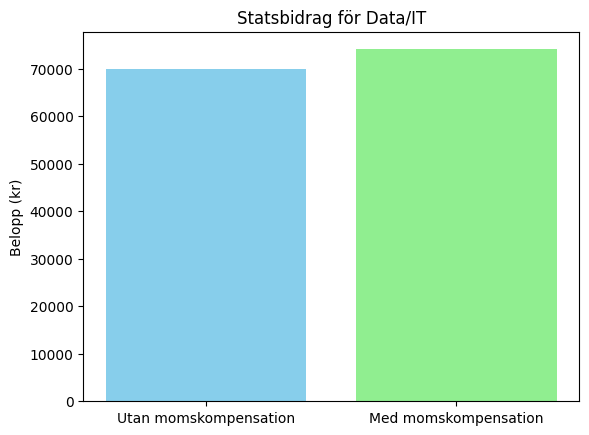

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\azizm\Documents\github\yh_project_the_skool_group4\EDA_filer\Data\statsbidrag_schablonnivåer.csv")
df.columns = df.columns.str.strip()

anordnare_lista = sorted(df["Utbildningsområde"].unique())
print("Välj ett utbildningsområde:")
for i, namn in enumerate(anordnare_lista, 1):
    print(f"{i}. {namn}")


val = input("Ange nummer för utbildningsområde: ")

try:
    val = int(val)
    if 1 <= val <= len(anordnare_lista):
        vald = anordnare_lista[val - 1]
        filtered = df[df["Utbildningsområde"] == vald].iloc[0]

        print(f"\n Statistik för: {vald}")
        print(f"- Utan momskompensation: {filtered['Utan momskompensation']}")
        print(f"- Med momskompensation: {filtered['Med momskompensation']}")

        
        kategorier = ['Utan momskompensation', 'Med momskompensation']
        värden = [filtered['Utan momskompensation'], filtered['Med momskompensation']]

        plt.bar(kategorier, värden, color=['skyblue', 'lightgreen'])
        plt.title(f"Statsbidrag för {vald}")
        plt.ylabel("Belopp (kr)")
        plt.show()

    else:
        print("Ogiltigt val – numret är utanför listan.")
except ValueError:
    print("Fel: Du måste ange ett nummer.")
